# Sentiment Prediction from Movie Review (IMDB)

Goal: Predict positive or negative sentiments from movie reviews

Dataset: [IMDB Movie reviews sentiment classification](https://keras.io/datasets/)

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import keras
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation

from keras.layers.embeddings import Embedding
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Flatten

np.random.seed(9)

Using TensorFlow backend.


## Load the data

In [2]:
max_words = 20000  # most common words
max_length = 500 # words per review limit

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_words,
                                                      skip_top=10,
                                                      maxlen=max_length)

print("Training reviews: {}".format(len(x_train)))
print("Testing reviews: {}".format(len(x_test)))

Training reviews: 25000
Testing reviews: 20947


## Process the data

In [3]:
# Pad input: limited to max_length
x_train = pad_sequences(x_train, max_length)
x_test = pad_sequences(x_test, max_length)

# One-hot encode the target
num_classes = 2
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


print("Training set:  x-shape={}  y-shape={}".format(x_train.shape, y_train.shape))
print("Testing  set:  x-shape={}  y-shape={}".format(x_test.shape, y_test.shape))

Training set:  x-shape=(25000, 500)  y-shape=(25000, 2)
Testing  set:  x-shape=(20947, 500)  y-shape=(20947, 2)


## Deep Neural Network

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 20)           400000    
_________________________________________________________________
flatten_1 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 16)                160016    
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 34        
Total params: 560,050.0
Trainable params: 560,050.0
Non-trainable params: 0.0
_________________________________________________________________
Training ....
Epoch 00004: early stopping


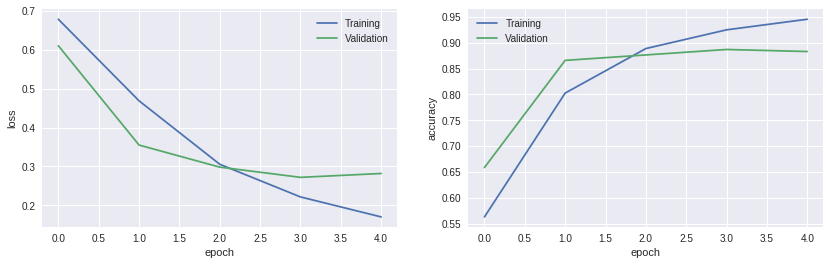

In [4]:
model = Sequential()
model.add(Embedding(max_words, 20, input_length=max_length))
model.add(Flatten())
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

callbacks = [keras.callbacks.EarlyStopping(monitor='val_loss', patience=0, verbose=1)]

print('Training ....')
history = model.fit(x_train, y_train, batch_size=512, epochs=10, verbose=0,
                    validation_data=(x_test, y_test), callbacks=callbacks)


plt.figure(figsize=(14, 4))
plt.subplot(121)
plt.plot(history.history['loss'], label='Training')
plt.plot(history.history['val_loss'], label='Validation')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()

plt.subplot(122)
plt.plot(history.history['acc'], label='Training')
plt.plot(history.history['val_acc'], label='Validation')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()

In [5]:
score = model.evaluate(x_test, y_test, verbose=0)
print("\nAccuracy: {:.4f}\n".format(score[1]))


Accuracy: 0.8829



Note that the test set was used as the validation set during traininng here